# Predicting strokes using Machine Learning

## Data Preparation

### Import required libraries 

In [56]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [57]:
#load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [58]:
#Read the first 5 lines of the data set
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
#Read the last 5 lines
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [60]:
#Get the shape of the data set
df.shape

(5110, 12)

In [61]:
#Analyze the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

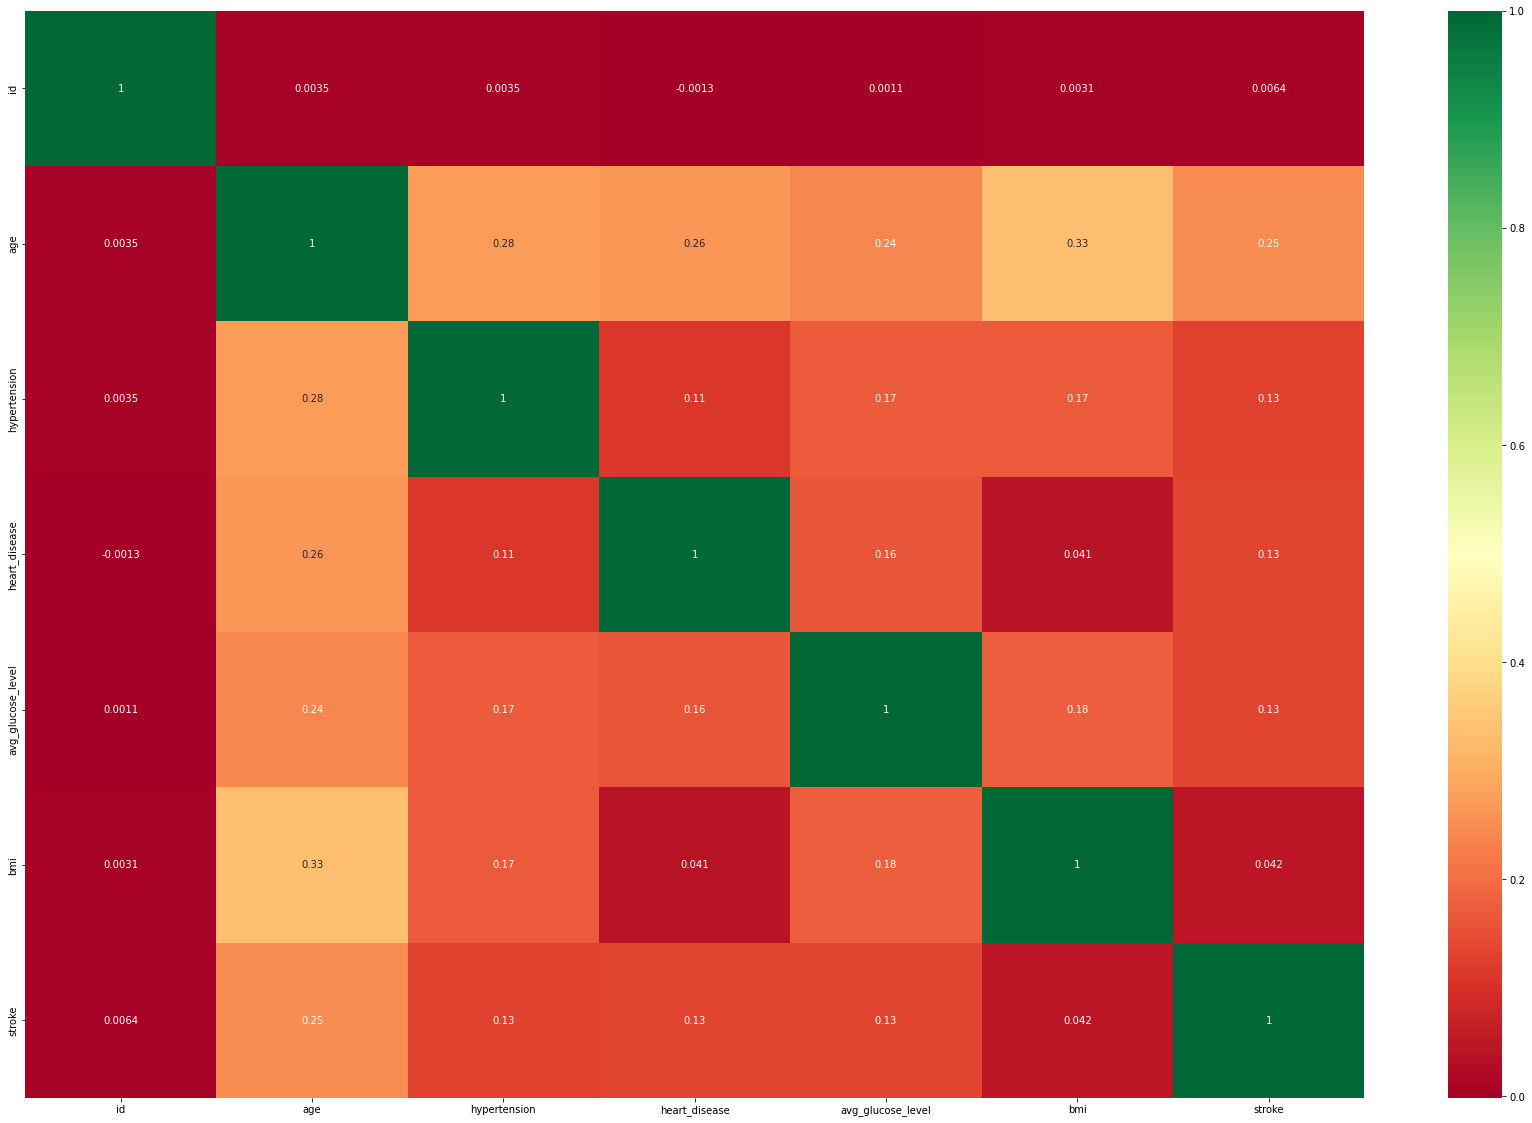

In [62]:
# plot heat map
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [63]:
#Correlation
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Preprocess the data

In [64]:
#Dropping Unneccesary columns
df.drop(["id"],axis=1,inplace=True)

In [65]:
#Get the shape of the dataset
df.shape

(5110, 11)

In [66]:
#check for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [67]:
# Drop datapoints with missing values in relevant columns
df.dropna(inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [68]:
# Get data types of columns
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [69]:
#View count of cells with object data type
for x in df.select_dtypes(include = 'object'):
    print(df[x].value_counts())

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Yes    3204
No     1705
Name: ever_married, dtype: int64
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


## Encoding Categorical data

In [70]:
# Replace 'ever_married' and 'Residence_type' with binary values

replace_values = {
  'ever_married': {
    'No': 0,
    'Yes': 1
  },
  'Residence_type': {
    'Rural': 0,
    'Urban': 1 
  }
}

df.replace(replace_values, inplace=True)

In [71]:
# Encode 'smoking_status' and 'gender' columns with numerical values using label encoding
ord_enc = preprocessing.OrdinalEncoder()
df[['gender', 'smoking_status']] = ord_enc.fit_transform(df[['gender', 'smoking_status']])
df[['gender', 'smoking_status']].head()

,gender,smoking_status
0,1.0,1.0
2,1.0,2.0
3,0.0,3.0
4,0.0,2.0
5,1.0,1.0


In [72]:
# Keep backup of dataframe to maintain idempotency of the following cell
df_bak = df

In [73]:
# Encode 'work_type' column with numerical values using one hot encoding

transformer = make_column_transformer(
  (preprocessing.OneHotEncoder(), ['work_type']),
  remainder='passthrough',
  verbose_feature_names_out=False
)

# Load backup dataframe to maintain idempotency
df = df_bak

transformed = transformer.fit_transform(df)
df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
df.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,0.0,1.0,0.0,0.0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,2.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,3.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,2.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0,1.0,1.0


In [74]:
df.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,0.0,1.0,0.0,0.0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,2.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,3.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,2.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0,1.0,1.0


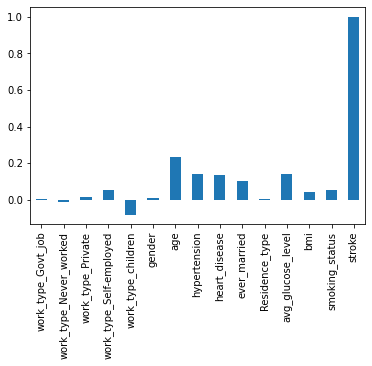

In [75]:
#plotting the correlation between target variable and other columns
Correlation=df.corrwith(df["stroke"])
Correlation.plot(kind='bar')
plt.show()

## Training the Model

In [76]:
y = df["stroke"]
x = df.drop(["stroke"],axis=1)

### Scaling data
Values are in different scales so values needed to be convert into same scale

In [77]:
#Scaling data
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.38370648, -0.067095  ,  0.86391759, ...,  2.77769839,
         0.98134488, -0.35178804],
       [-0.38370648, -0.067095  ,  0.86391759, ...,  0.0138418 ,
         0.45926914,  0.58523176],
       [-0.38370648, -0.067095  ,  0.86391759, ...,  1.48413156,
         0.70120668,  1.52225157],
       ...,
       [-0.38370648, -0.067095  , -1.15751781, ..., -0.50236926,
         0.21733161,  0.58523176],
       [-0.38370648, -0.067095  ,  0.86391759, ...,  1.37291993,
        -0.41934612, -0.35178804],
       [ 2.60615876, -0.067095  , -1.15751781, ..., -0.45081569,
        -0.34294479, -1.28880785]])

### Split dataset into training and test sets

In [78]:
#Splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
#Preparing the dataframe to print the models and their respecrive accuracy
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

# Before Oversampling

## Random Forest

In [80]:
#Create a model using RandomForestClassifier
model = RandomForestClassifier()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Random Forest Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Random Forest', 'Accuracy': acc}, ignore_index=True)

Random Forest Classifier scores
Model accuracy	: 0.945010183299389
Percentage	: 94.5%
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       929
         1.0       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



## SVC

In [81]:
# Create a model using SVC classifier
model = SVC()
# Train the model using the training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

y_pred = model.predict(x_test)

print('SVC Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'SVC', 'Accuracy': acc}, ignore_index=True)

SVC Classifier scores
Model accuracy	: 0.9460285132382892
Percentage	: 94.6%
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       929
         1.0       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



## Decision Tree

In [82]:
#Create a model using DecisionTree
model = DecisionTreeClassifier()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': acc}, ignore_index=True)

Decision Tree Classifier scores
Model accuracy	: 0.9175152749490835
Percentage	: 91.8%
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       929
         1.0       0.17      0.13      0.15        53

    accuracy                           0.92       982
   macro avg       0.56      0.55      0.55       982
weighted avg       0.91      0.92      0.91       982



## Logistic Regression

In [83]:
#Create a model using LogisticRegression
model = LogisticRegression()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Logistic Regression scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Logistic Regression', 'Accuracy': acc}, ignore_index=True)

Logistic Regression scores
Model accuracy	: 0.9460285132382892
Percentage	: 94.6%
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       929
         1.0       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [84]:
#Print the model and respective accuracy
print("Model and it's respective accuracy before oversampling - ")
print(model_accuracy)

Model and it's respective accuracy before oversampling - 
                 Model  Accuracy
0        Random Forest  0.945010
1                  SVC  0.946029
2        Decision Tree  0.917515
3  Logistic Regression  0.946029


### Inspect for data inbalance

<AxesSubplot:xlabel='stroke', ylabel='count'>

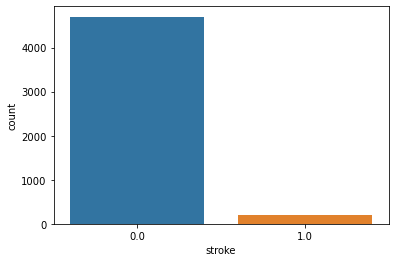

In [86]:
sns.countplot(x='stroke',data=df)

In [87]:
#Count number of people who has experienced a stroke or not
df['stroke'].value_counts()

#Percentage of people who had a stroke
print("Percentage of people who had a stroke = ")
len(df[df['stroke'] == 1])/len(df)*100

Percentage of people who had a stroke = 


4.257486249745366

### Oversample the data

<AxesSubplot:xlabel='stroke', ylabel='count'>

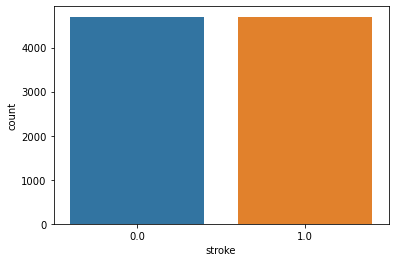

In [89]:
# Oversample data to fix the data imbalance
x, y = SMOTE().fit_resample(x, y)

# Inspect data balance
sns.countplot(x=y, data=df)

In [90]:
#Resplit the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# After OverSampling

In [91]:
#Preparing the dataframe to print the models and their respecrive accuracy
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

## Random Forest

In [92]:
#Create a model using RandomForestClassifier 
model = RandomForestClassifier()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Random Forest Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Random Forest', 'Accuracy': acc}, ignore_index=True)

Random Forest Classifier scores
Model accuracy	: 0.9654255319148937
Percentage	: 96.5%
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       922
         1.0       0.96      0.97      0.97       958

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## SVC

In [93]:
# Create a model using SVC classifier
model = SVC()
# Train the model using the training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

y_pred = model.predict(x_test)

print('SVC Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'SVC', 'Accuracy': acc}, ignore_index=True)

SVC Classifier scores
Model accuracy	: 0.8585106382978723
Percentage	: 85.9%
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       922
         1.0       0.83      0.91      0.87       958

    accuracy                           0.86      1880
   macro avg       0.86      0.86      0.86      1880
weighted avg       0.86      0.86      0.86      1880



## Decision Tree

In [94]:
#Create a model using DecisionTree
model = DecisionTreeClassifier()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': acc}, ignore_index=True)

Decision Tree Classifier scores
Model accuracy	: 0.9191489361702128
Percentage	: 91.9%
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       922
         1.0       0.91      0.93      0.92       958

    accuracy                           0.92      1880
   macro avg       0.92      0.92      0.92      1880
weighted avg       0.92      0.92      0.92      1880



## Logistic Regression

In [95]:
#Create a model using LogisticRegression
model = LogisticRegression()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Logistic Regression scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Logistic Regression', 'Accuracy': acc}, ignore_index=True)

Logistic Regression scores
Model accuracy	: 0.7760638297872341
Percentage	: 77.6%
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       922
         1.0       0.77      0.79      0.78       958

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.78      0.78      0.78      1880



In [96]:
#Print the model and respective accuracy
print("Model and it's respective accuracy after oversampling - ")
print(model_accuracy)

Model and it's respective accuracy after oversampling - 
                 Model  Accuracy
0        Random Forest  0.965426
1                  SVC  0.858511
2        Decision Tree  0.919149
3  Logistic Regression  0.776064
